# Image Regression (fixed scale on y-axis, 2 changes)
- x_min = 0
- x_max = 128
- y_min = 200
- y_max = 400
- minsep = 5 #min separation
- maxsepadd = 60 #max addition to minsep
- mindur = 5 #min duration of change
- maxduradd = 60 #max addition to mindur
- min_step_size = 20 #40 #minimum size of step

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'dashlink_regression/'

Mounted at /content/gdrive


In [2]:
from fastai.vision import *

In [3]:
!python --version
! pip list | grep fastai

Python 3.6.9
fastai                        1.0.61         


In [4]:
# trnpath = Path('Tail_687_1'); trnpath
trnpath = Path(base_dir + 'Tail_687_1'); trnpath

PosixPath('/content/gdrive/My Drive/dashlink_regression/Tail_687_1')

In [5]:
trnpath.ls()

[PosixPath('/content/gdrive/My Drive/dashlink_regression/Tail_687_1/png7'),
 PosixPath('/content/gdrive/My Drive/dashlink_regression/Tail_687_1/1min'),
 PosixPath('/content/gdrive/My Drive/dashlink_regression/Tail_687_1/png10'),
 PosixPath('/content/gdrive/My Drive/dashlink_regression/Tail_687_1/png12'),
 PosixPath('/content/gdrive/My Drive/dashlink_regression/Tail_687_1/png4'),
 PosixPath('/content/gdrive/My Drive/dashlink_regression/Tail_687_1/png5'),
 PosixPath('/content/gdrive/My Drive/dashlink_regression/Tail_687_1/png6'),
 PosixPath('/content/gdrive/My Drive/dashlink_regression/Tail_687_1/png8'),
 PosixPath('/content/gdrive/My Drive/dashlink_regression/Tail_687_1/png9'),
 PosixPath('/content/gdrive/My Drive/dashlink_regression/Tail_687_1/png11')]

In [6]:
# set output folder
outpath = Path('png9'); outpath

PosixPath('png9')

In [7]:
!ls "{trnpath}"/{outpath}

687200104111158-1min.png    687200107281824-1min.png
687200104111441-1min.png    687200107282131-1min.png
687200104111637-1min.png    687200107291231-1min.png
687200104120347-1min.png    687200107291450-1min.png
687200104120604-1min.png    687200107291717-1min.png
687200104120922-1min.png    687200107291928-1min.png
687200104121106-1min.png    687200107292117-1min.png
687200104121330-1min.png    687200107300558-1min.png
687200104121649-1min.png    687200107300827-1min.png
687200104130631-1min.png    687200107301033-1min.png
687200104130953-1min.png    687200107301239-1min.png
687200104131343-1min.png    687200107301413-1min.png
687200104131515-1min.png    687200107301654-1min.png
687200104140606-1min.png    687200107301844-1min.png
687200104140748-1min.png    687200107302138-1min.png
687200104140925-1min.png    687200107302302-1min.png
687200104141245-1min.png    687200107310823-1min.png
687200104141536-1min.png    687200107311025-1min.png
687200104141732-1min.png    687200107311224-1m

In [8]:
! ls -altrh "{trnpath}"/{outpath}/*.csv

-rw------- 1 root root 37K Sep 21 20:02 '/content/gdrive/My Drive/dashlink_regression/Tail_687_1/png9/synthetic.csv'


In [9]:
df = pd.read_csv(trnpath/outpath/'synthetic.csv'); print(df.shape)
df.head()

(594, 13)


,filename,beg_t,actn1_t,comp1_t,actn2_t,comp2_t,end_t,beg_l,actn1_l,comp1_l,actn2_l,comp2_l,end_l
0,687200107081437-1min,0,29,65,71,103,128,388,388,240,240,205,205
1,687200107060733-1min,0,16,22,30,86,128,285,285,324,324,231,231
2,687200108271913-1min,0,5,22,29,34,128,345,345,223,223,386,386
3,687200109111035-1min,0,5,16,22,40,128,336,336,374,374,238,238
4,687200108290643-1min,0,9,14,53,85,128,334,334,311,311,251,251


In [10]:
tfms = get_transforms(do_flip=False, flip_vert=False, 
                      max_rotate=0., max_zoom=1., 
                      max_lighting=0., max_warp=0.)

In [11]:
trnpath.ls()

[PosixPath('/content/gdrive/My Drive/dashlink_regression/Tail_687_1/png7'),
 PosixPath('/content/gdrive/My Drive/dashlink_regression/Tail_687_1/1min'),
 PosixPath('/content/gdrive/My Drive/dashlink_regression/Tail_687_1/png10'),
 PosixPath('/content/gdrive/My Drive/dashlink_regression/Tail_687_1/png12'),
 PosixPath('/content/gdrive/My Drive/dashlink_regression/Tail_687_1/png4'),
 PosixPath('/content/gdrive/My Drive/dashlink_regression/Tail_687_1/png5'),
 PosixPath('/content/gdrive/My Drive/dashlink_regression/Tail_687_1/png6'),
 PosixPath('/content/gdrive/My Drive/dashlink_regression/Tail_687_1/png8'),
 PosixPath('/content/gdrive/My Drive/dashlink_regression/Tail_687_1/png9'),
 PosixPath('/content/gdrive/My Drive/dashlink_regression/Tail_687_1/png11')]

In [12]:
!cat "{trnpath}"/{outpath}/synthetic.csv

filename,beg_t,actn1_t,comp1_t,actn2_t,comp2_t,end_t,beg_l,actn1_l,comp1_l,actn2_l,comp2_l,end_l
687200107081437-1min,0,29,65,71,103,128,388,388,240,240,205,205
687200107060733-1min,0,16,22,30,86,128,285,285,324,324,231,231
687200108271913-1min,0,5,22,29,34,128,345,345,223,223,386,386
687200109111035-1min,0,5,16,22,40,128,336,336,374,374,238,238
687200108290643-1min,0,9,14,53,85,128,334,334,311,311,251,251
687200108181535-1min,0,16,23,58,92,128,311,311,383,383,246,246
687200108281250-1min,0,12,22,35,56,128,302,302,253,253,226,226
687200104120922-1min,0,19,27,46,103,128,297,297,385,385,361,361
687200107121619-1min,0,29,51,73,87,128,251,251,274,274,308,308
687200107201925-1min,0,43,71,96,110,128,275,275,365,365,230,230
687200107292117-1min,0,5,13,27,37,128,341,341,393,393,277,277
687200104280530-1min,0,24,41,49,60,128,223,223,369,369,236,236
687200104210727-1min,0,31,53,72,89,128,253,253,298,298,320,320
687200107081257_1-1min,0,22,32,55,66,128,219,219,385,385,224,224
687200109011816-1min

In [ ]:
# il = ImageList.from_csv(trnpath/outpath, 'synthetic.csv', folder='.', suffix='.png')
# il

In [ ]:
# ils = il.split_by_rand_pct(0.2)
# ils

In [ ]:
#ils.label_from_func??

In [ ]:
# lls = ils.label_from_df(cols='comp_t', label_cls=FloatList)
# #lls = ils.label_from_func(get_float_labels, label_cls=FloatList)
# lls

In [ ]:
np.random.seed(42)
src = (ImageList.from_csv(trnpath/outpath, 'synthetic.csv', folder='.', suffix='.png')
       .split_by_rand_pct(0.2)
       #.label_from_df(cols=['comp_t','comp_l'], label_cls=FloatList)) #default is CategoryList, now becomes FloatList
       .label_from_df(cols=['comp1_t','comp2_t'], label_cls=FloatList)) #default is CategoryList, now becomes FloatList

In [ ]:
data = (src.transform(tfms, size=133) #133 #128 #todo? tfm_y=True
        .databunch().normalize(imagenet_stats))

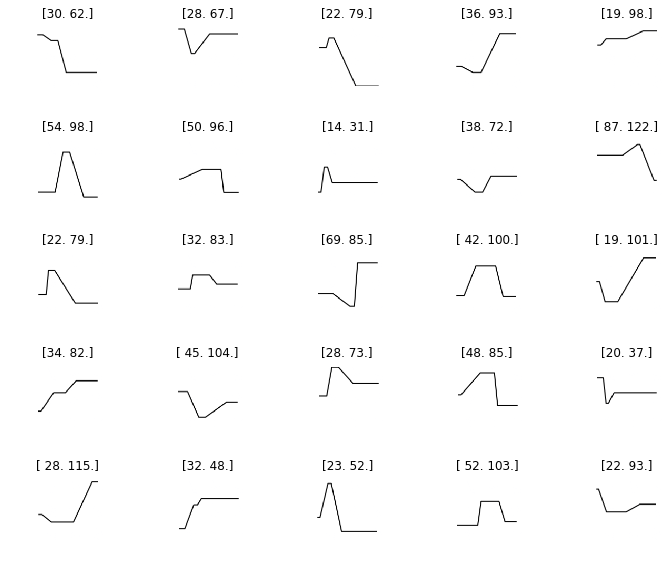

In [ ]:
data.show_batch(rows=5, figsize=(10,8))

In [ ]:
data.c, len(data.train_ds), len(data.valid_ds)

(2, 476, 118)

## Train model

In [ ]:
arch = models.resnet18
#arch = models.resnet34
#arch = models.resnet50

In [ ]:
learn = cnn_learner(data, arch)
learn.loss_func = MSELossFlat()
#learn.loss = MSELossFlat()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


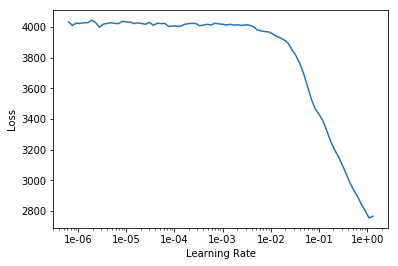

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
lrf = 5e-2

In [ ]:
learn.fit_one_cycle(4, slice(lrf)) #351,125,75,53,60,48,49,45,58,38,34,32,35,32,31,28,30

epoch,train_loss,valid_loss,time
0,29.507669,33.931847,00:37
1,30.770475,35.820000,00:36
2,31.518562,35.860138,00:36
3,31.698149,30.884645,00:39


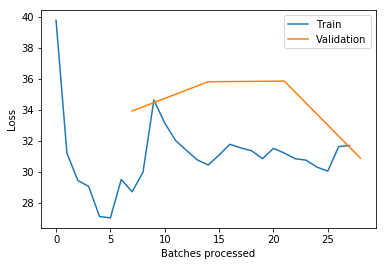

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.save('stage-1') #673,114,89,68,60; 351,125,75,53,48,45,38,34,32,31,28

In [ ]:
#go back to learn.fit_one_cycle(...)

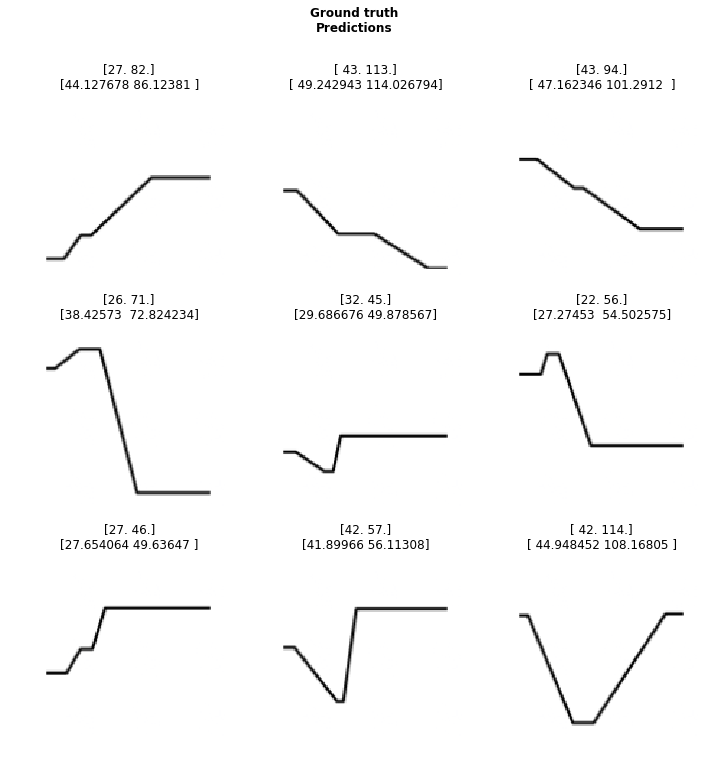

In [ ]:
learn.show_results(rows=3)

In [ ]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (476 items)
x: ImageList
Image (3, 133, 133),Image (3, 133, 133),Image (3, 133, 133),Image (3, 133, 133),Image (3, 133, 133)
y: FloatList
[ 65. 103.],[22. 86.],[16. 40.],[14. 85.],[23. 92.]
Path: Tail_687_1/png9;

Valid: LabelList (118 items)
x: ImageList
Image (3, 133, 133),Image (3, 133, 133),Image (3, 133, 133),Image (3, 133, 133),Image (3, 133, 133)
y: FloatList
[27. 82.],[ 43. 113.],[43. 94.],[26. 71.],[32. 45.]
Path: Tail_687_1/png9;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-

In [ ]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


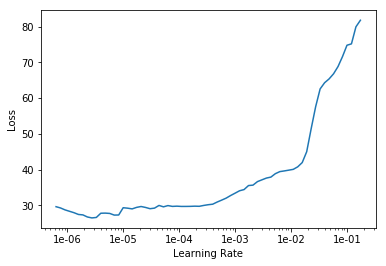

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
# lru = 1e-7
lru = 1e-8

In [ ]:
#learn.fit_one_cycle(4, slice(lru, lrf/5)) #24,23,23,19,17,16
#lru = 1e-7:
# learn.fit_one_cycle(4, slice(lru, lrf/10)) #24,24,25,26,21,21,20,22,23,23,22
# learn.fit_one_cycle(4, slice(lru, lrf/5)) #26,25,25,27,24
#lru = 1e-8:
# learn.fit_one_cycle(10, slice(lru, lrf/10)) #24,24
learn.fit_one_cycle(10, slice(lru, lrf/5)) #24

epoch,train_loss,valid_loss,time
0,30.876877,27.795658,00:51
1,31.874971,26.239447,00:51
2,29.762299,26.323061,00:55
3,29.100384,27.765600,00:58
4,28.098408,27.136421,00:57
5,28.789305,30.241302,00:58
6,27.831360,24.904280,00:57
7,28.223448,24.957926,00:53
8,27.530203,24.052418,00:56
9,27.431902,24.123798,00:56


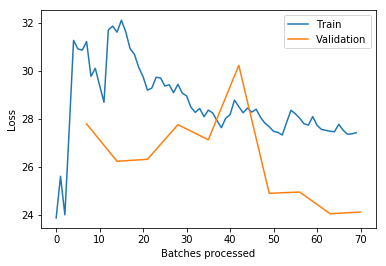

In [ ]:
learn.recorder.plot_losses()

In [ ]:
#save only if better !!!

In [ ]:
learn.save('stage-2') #52,49,46,43,40,39;   24,24,21,20

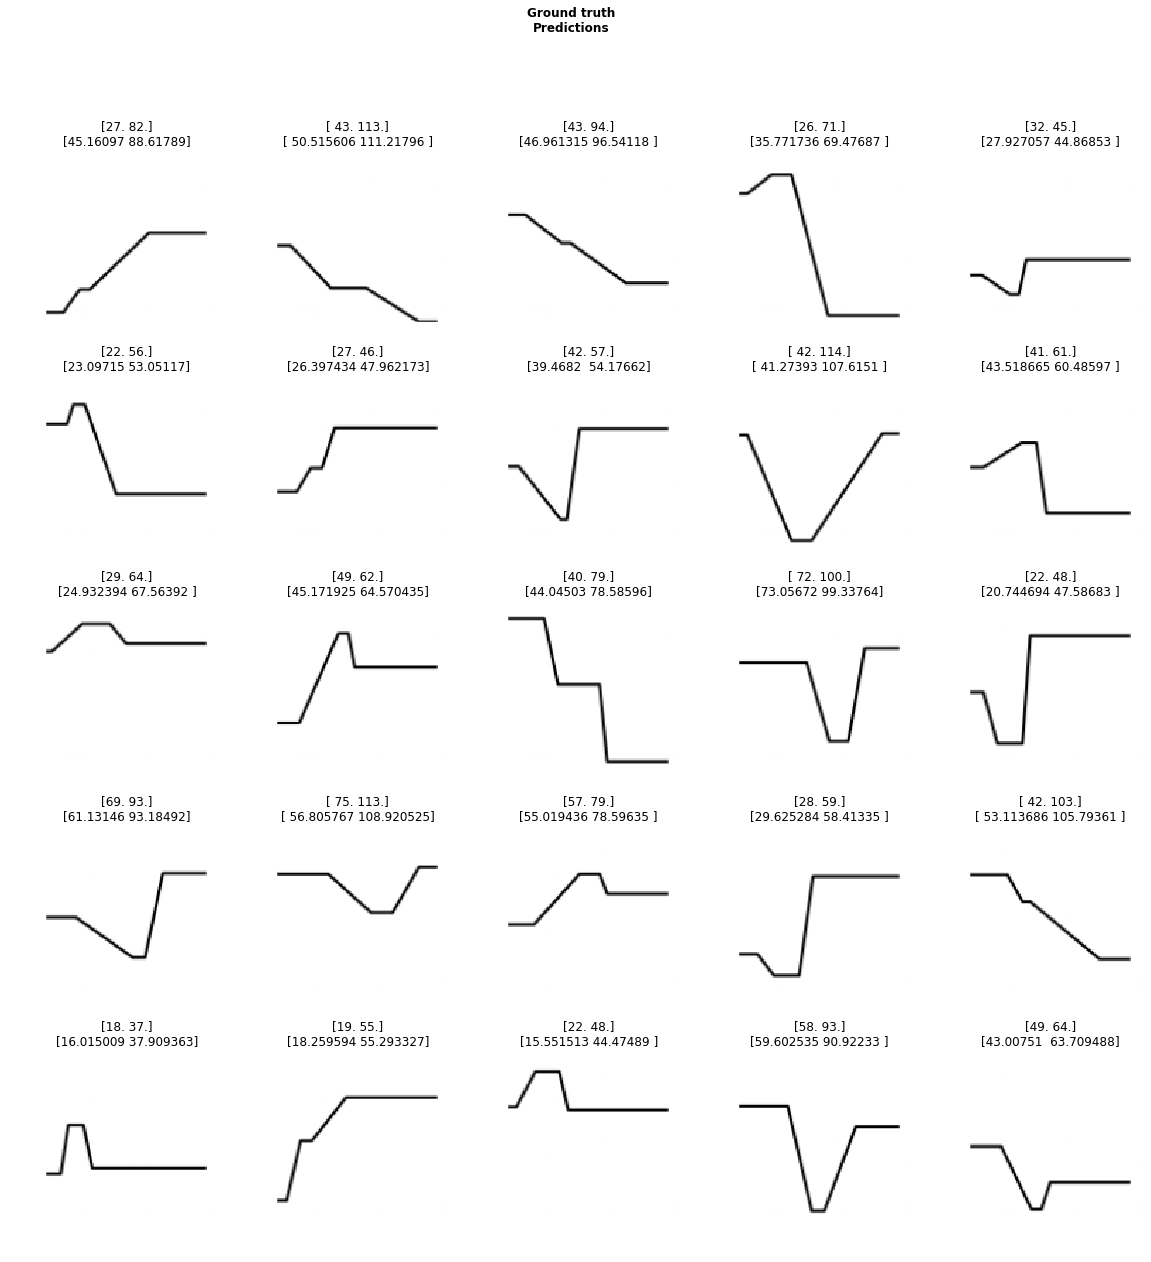

In [ ]:
learn.show_results()

## Interpretation

In [ ]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (476 items)
x: ImageList
Image (3, 133, 133),Image (3, 133, 133),Image (3, 133, 133),Image (3, 133, 133),Image (3, 133, 133)
y: FloatList
[ 65. 103.],[22. 86.],[16. 40.],[14. 85.],[23. 92.]
Path: Tail_687_1/png9;

Valid: LabelList (118 items)
x: ImageList
Image (3, 133, 133),Image (3, 133, 133),Image (3, 133, 133),Image (3, 133, 133),Image (3, 133, 133)
y: FloatList
[27. 82.],[ 43. 113.],[43. 94.],[26. 71.],[32. 45.]
Path: Tail_687_1/png9;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-

## Test Inference/Production (on train data)

In [ ]:
learn.export()

In [ ]:
!ls -altrh {trnpath}/{outpath}/export.pkl

-rw-rw-r-- 1 proj proj 45M Jun 14 12:12 Tail_687_1/png9/export.pkl


In [ ]:
!ls {trnpath}/{outpath}

687200104111158-1min.png    687200107281824-1min.png
687200104111441-1min.png    687200107282131-1min.png
687200104111637-1min.png    687200107291231-1min.png
687200104120347-1min.png    687200107291450-1min.png
687200104120604-1min.png    687200107291717-1min.png
687200104120922-1min.png    687200107291928-1min.png
687200104121106-1min.png    687200107292117-1min.png
687200104121330-1min.png    687200107300558-1min.png
687200104121649-1min.png    687200107300827-1min.png
687200104130631-1min.png    687200107301033-1min.png
687200104130953-1min.png    687200107301239-1min.png
687200104131343-1min.png    687200107301413-1min.png
687200104131515-1min.png    687200107301654-1min.png
687200104140606-1min.png    687200107301844-1min.png
687200104140748-1min.png    687200107302138-1min.png
687200104140925-1min.png    687200107302302-1min.png
687200104141245-1min.png    687200107310823-1min.png
687200104141536-1min.png    687200107311025-1min.png
687200104141732-1min.png    687200107311224-1m

In [ ]:
learn = load_learner(trnpath/outpath)

In [ ]:
!ls {trnpath}/{outpath}

687200104111158-1min.png    687200107281824-1min.png
687200104111441-1min.png    687200107282131-1min.png
687200104111637-1min.png    687200107291231-1min.png
687200104120347-1min.png    687200107291450-1min.png
687200104120604-1min.png    687200107291717-1min.png
687200104120922-1min.png    687200107291928-1min.png
687200104121106-1min.png    687200107292117-1min.png
687200104121330-1min.png    687200107300558-1min.png
687200104121649-1min.png    687200107300827-1min.png
687200104130631-1min.png    687200107301033-1min.png
687200104130953-1min.png    687200107301239-1min.png
687200104131343-1min.png    687200107301413-1min.png
687200104131515-1min.png    687200107301654-1min.png
687200104140606-1min.png    687200107301844-1min.png
687200104140748-1min.png    687200107302138-1min.png
687200104140925-1min.png    687200107302302-1min.png
687200104141245-1min.png    687200107310823-1min.png
687200104141536-1min.png    687200107311025-1min.png
687200104141732-1min.png    687200107311224-1m

In [ ]:
img = open_image(trnpath/outpath/'687200104121330-1min.png')
# img = open_image(str(trnpath/outpath/r['filename'])+'.png')
x_prd = learn.predict(img)[0].data[0]
x_prd

59.61145

In [ ]:
learn.predict(img)[0].data

array([59.61145, 90.84416], dtype=float32)

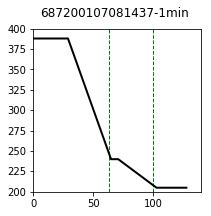

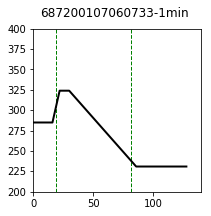

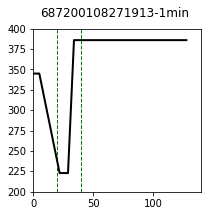

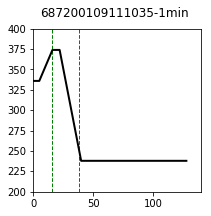

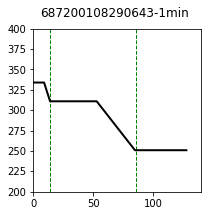

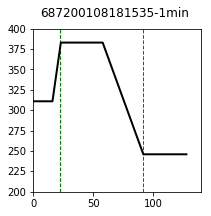

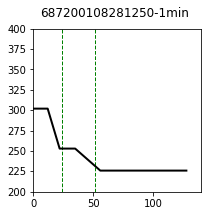

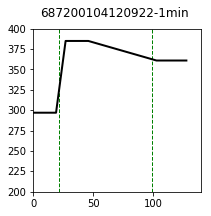

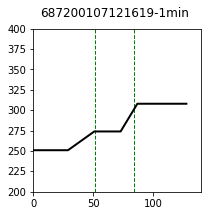

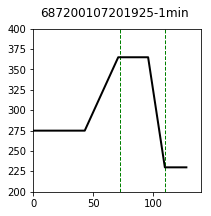

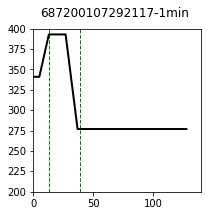

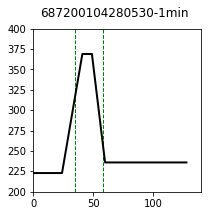

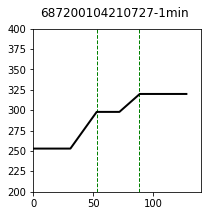

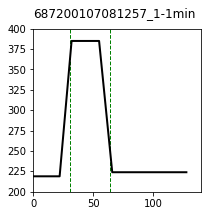

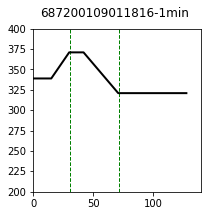

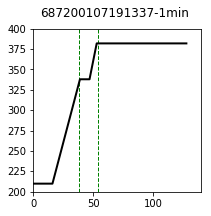

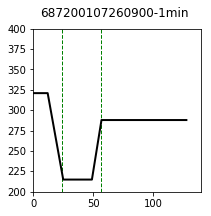

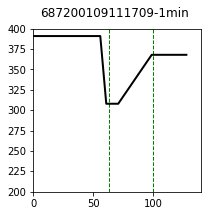

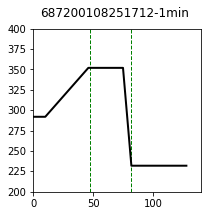

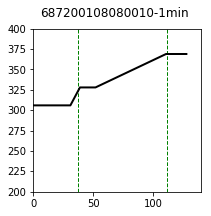

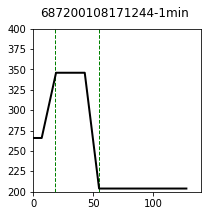

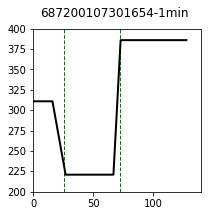

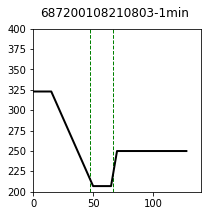

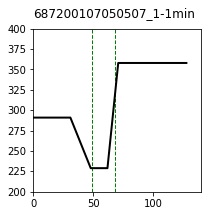

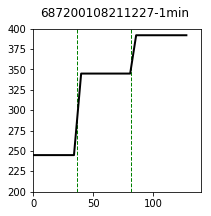

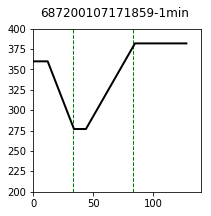

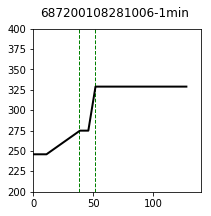

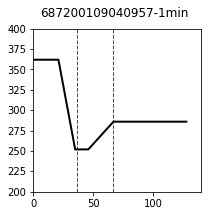

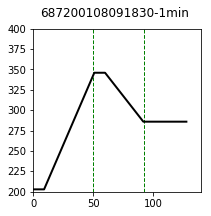

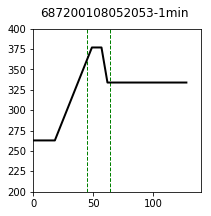

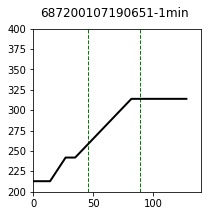

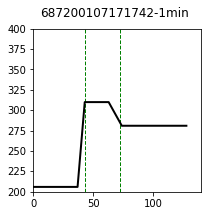

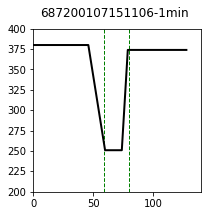

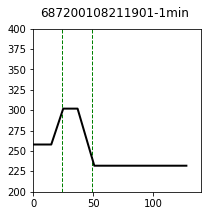

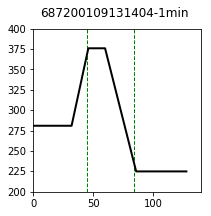

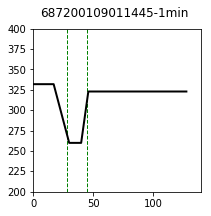

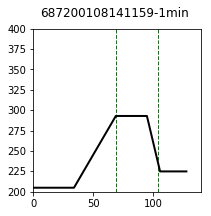

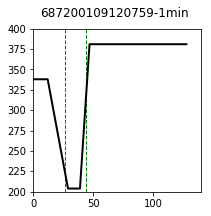

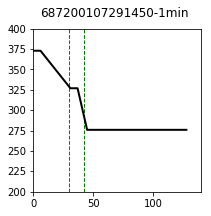

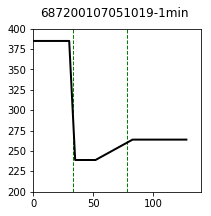

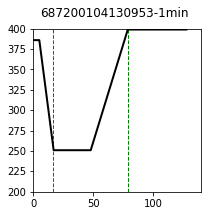

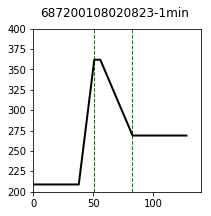

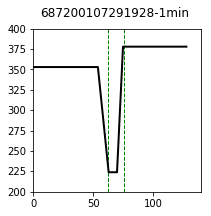

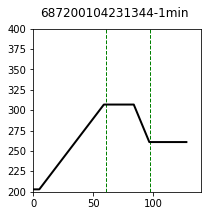

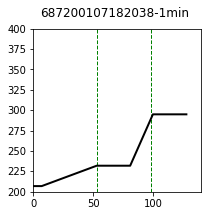

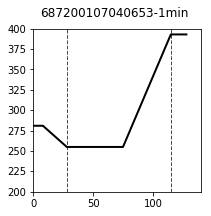

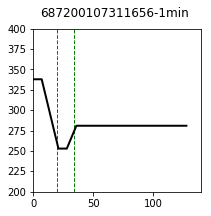

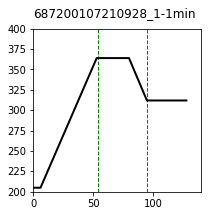

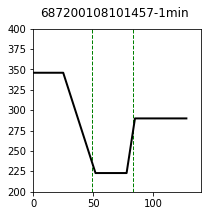

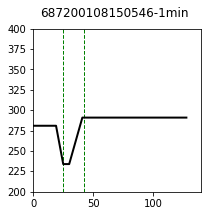

In [ ]:
plt.rcParams.update({'figure.max_open_warning': 0})
x_min = 0
x_max = 140 #128
y_min = 200
y_max = 400
for i, r in df.iterrows():
    if i==50: break
    plt.figure(figsize=(3,3)) #(2,2)
    fig = plt.gcf()
    ax = plt.gca()
    fig.suptitle(r['filename'])
    
    img = open_image(str(trnpath/outpath/r['filename'])+'.png')
    x_prd = learn.predict(img)[0].data
    x_prd_1 = x_prd[0]
    x_prd_2 = x_prd[1]
    
    ax.set_xlim(left=x_min, right=x_max)
    ax.set_ylim(bottom=y_min, top=y_max)        
    plt.plot([r.beg_t,r.actn1_t,r.comp1_t,r.actn2_t,r.comp2_t,r.end_t], [r.beg_l,r.actn1_l,r.comp1_l,r.actn2_l,r.comp2_l,r.end_l], '-k', lw=2) #lw=1
    #plt.plot([r.beg_t,r.actn1_t,r.comp1_to,r.actn2_t,r.comp2_to,r.end_t], [r.beg_l,r.actn1_l,r.comp1_l,r.actn2_l,r.comp2_l,r.end_l], '-k', lw=2) #lw=1
    plt.vlines(x_prd_1, ymin=y_min, ymax=y_max, color='g', linestyle='--', linewidth=1)
    plt.vlines(x_prd_2, ymin=y_min, ymax=y_max, color='g', linestyle='--', linewidth=1)